In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
from GraphClass import data_graph
from GraphClass import scatterplot_matrix
from GraphClass import strongest_correlation
from GraphClass import scatterplot_matrix_song_popularity
from GraphClass import PolynomialRegression
from GraphClass import bestmodel

We began by importing the Song Popularity Dataset, and cleaned the data by dropping any songs that appeared multiple times in the dataset. We also dropped liveness from the dataset because it is not relevant to song popularity.

In [3]:
song_data = pd.read_csv(r'song_data.csv')
song_data = song_data.drop_duplicates(subset=['song_name'], keep='first').drop(['liveness'], axis=1)
song_data

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,-4.095,1,0.0294,167.060,4,0.4740
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,-6.407,0,0.0498,105.256,4,0.3700
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,-7.828,1,0.0792,123.881,4,0.3240
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,-4.938,1,0.1070,122.444,4,0.1980
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,-5.065,1,0.0313,172.011,4,0.5740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18827,Stay Awake,55,114582,0.898000,0.370,0.136,0.000263,7,-13.528,1,0.0433,146.081,4,0.0592
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,-16.107,1,0.0348,113.969,4,0.3000
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,-12.222,1,0.0355,130.534,4,0.2860
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,-12.020,1,0.0328,106.063,4,0.3230


Firstly, we created a class that can be used to easily display different types of graphs for the same variables. For example, if we want to graph energy vs loudness, we can create a data_graph object with those variables and their respective labels. Then, we can graph this data using our class's scatter function, line function, and boxplot function. 

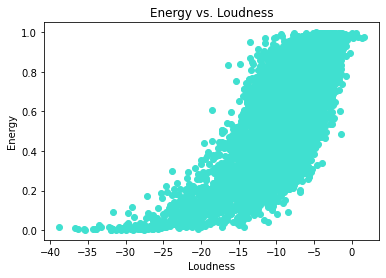

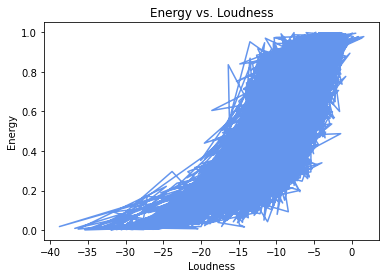

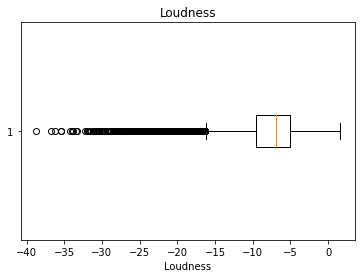

In [4]:
eand1 = data_graph(x_label = 'Loudness', y_label = 'Energy', x_data = song_data['loudness'], y_data = song_data['energy'])
eand1.scatter("turquoise")
eand1.line("cornflowerblue")
eand1.box()

As shown above, a line plot does not work well for our raw data, so here we demonstrate one way in which it can be used. By choosing one of the variables from our data, key, that is plotted on intervals, we were able to find the mean song popularity for each interval AND THEN utilize the line plot function.

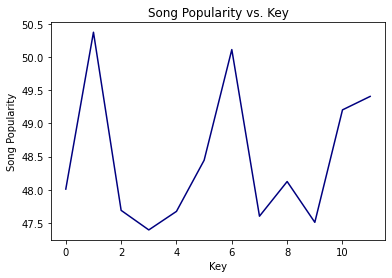

In [5]:
key_sort = song_data.sort_values('key')
avg_pop = []
for key, df_key in key_sort.groupby("key"):
    avg_pop.append(df_key["song_popularity"].mean())
avg_pop
keys = song_data.groupby("key").aggregate(len).reset_index()['key']
kandp = data_graph('Key', 'Song Popularity', keys, avg_pop)
kandp.line("navy")

We wanted to look at how the different song variables related to one another, excluding song popularity because we will be examining that later on. We decided to also drop song name because strings cannot be plotted, and then used a scatterplot matrix to disaplay each combination of variables and their correlation coefficients.

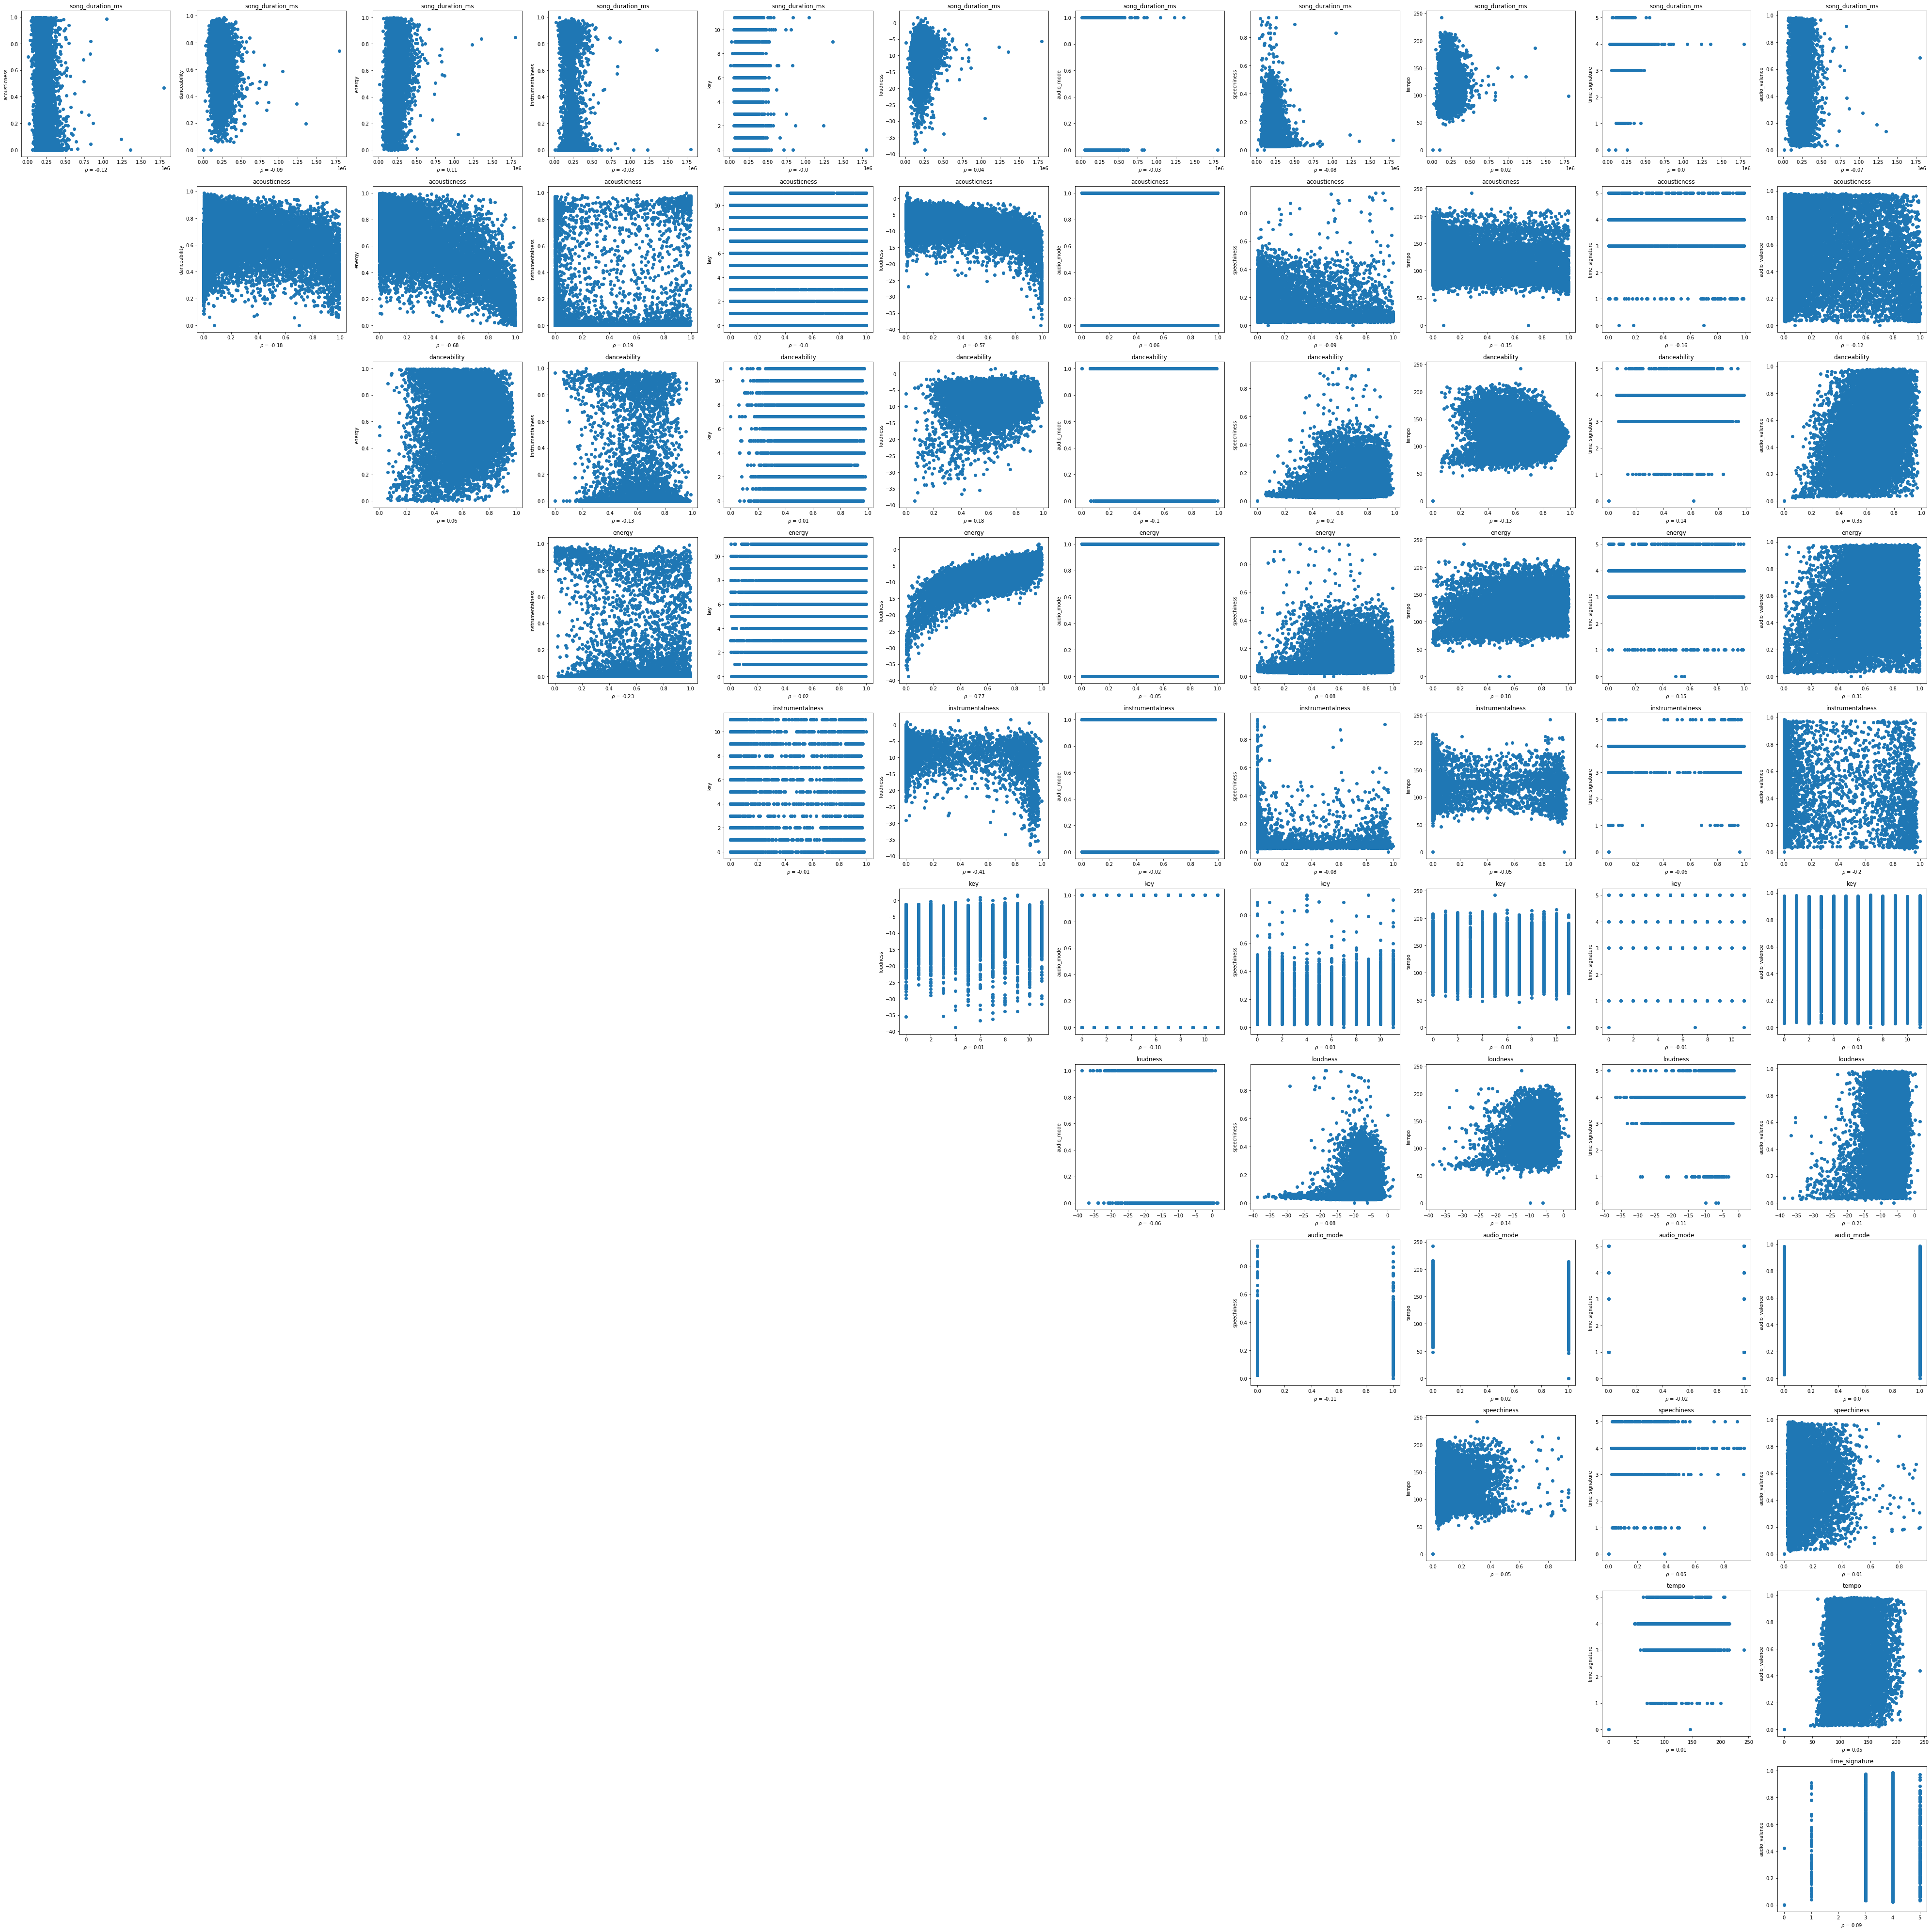

In [6]:
df = song_data.drop(['song_name', 'song_popularity'], axis = 1)
cols = list(df.columns)
figsize = (60, 60)

scatterplot_matrix(cols, figsize, df)

Our scatterplot matrix shown above is somewhat hard to interpret because of the large number of graphs, so we created a function to only display the graphs with correlation coefficients higher than 0.3 or less than -0.3 which demonstrates a relationship of moderate significance.

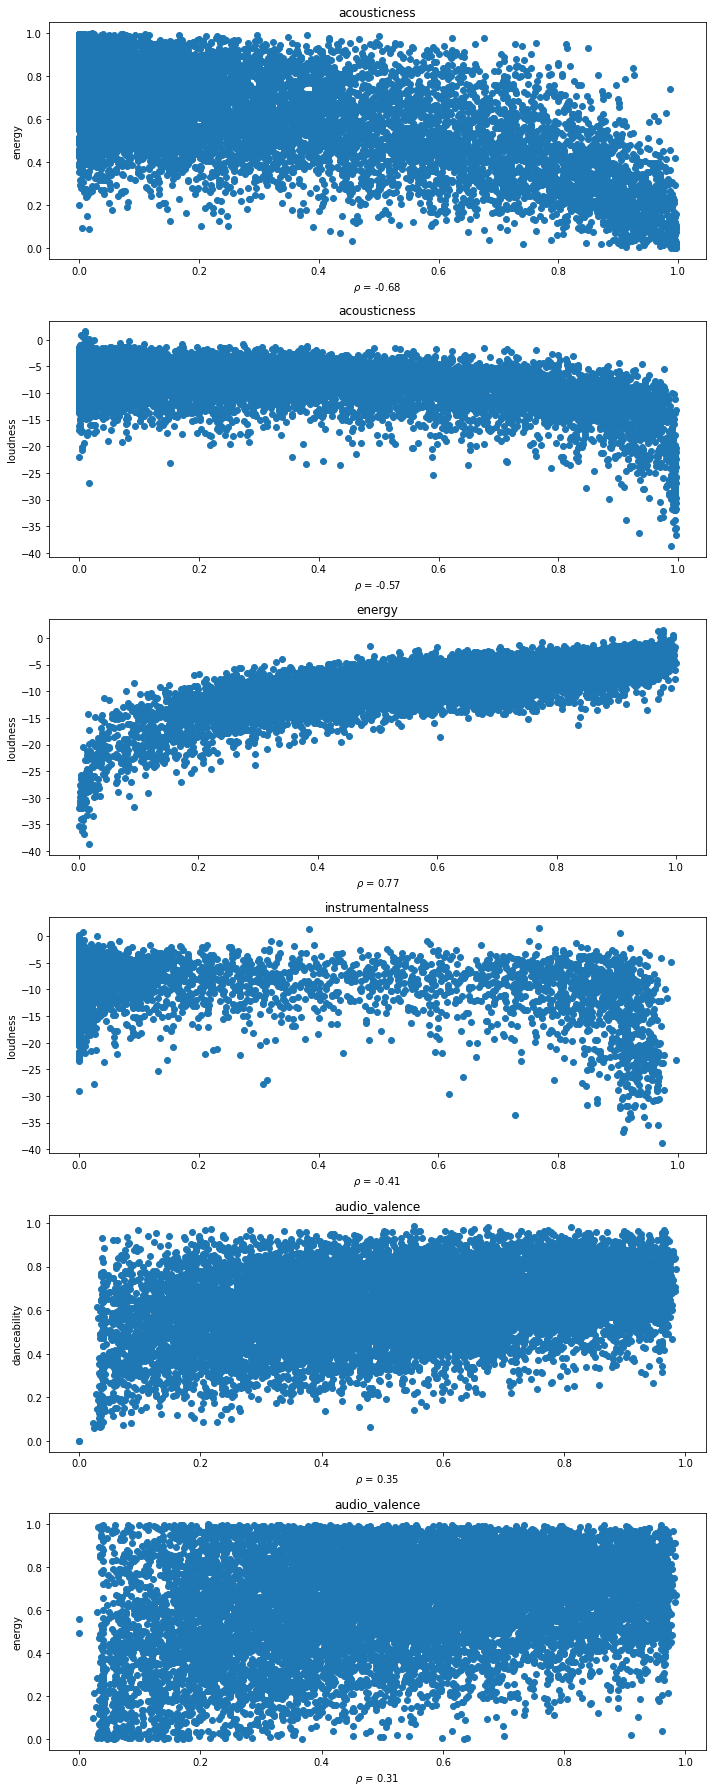

In [7]:
figsize = (10, 25)
desired_coef = 0.3
strongest_correlation(cols, desired_coef, figsize, df)

We used machine learning to find the best model for our strongest correlation graphs.

PolynomialFeatures: for every number x calculate (x^3, x^2, x, 1)

LinearRegression: find the best (a, b, c, d) for the data

In [8]:
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

lr = LinearRegression() 

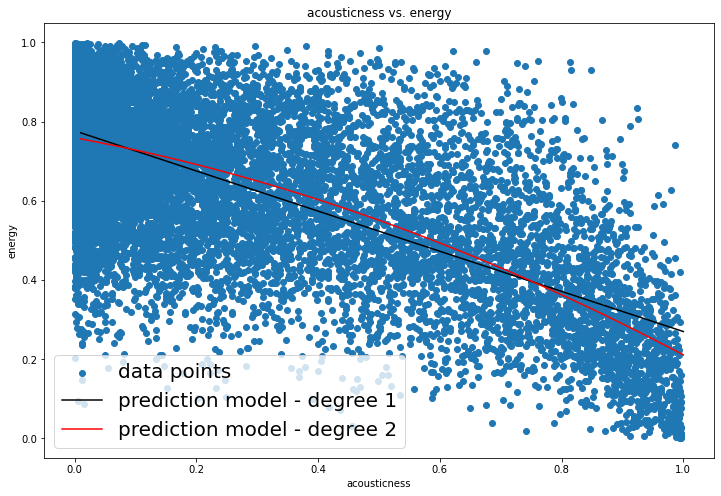

The polynomial regression model is the better perdiction model.
The model function is f(x) = -0.2629671595167163 x^2 + (-0.28522079455196564) x + (0.7591304242156334)


In [9]:
bestmodel(song_data['acousticness'],song_data['energy'], 'acousticness', 'energy')

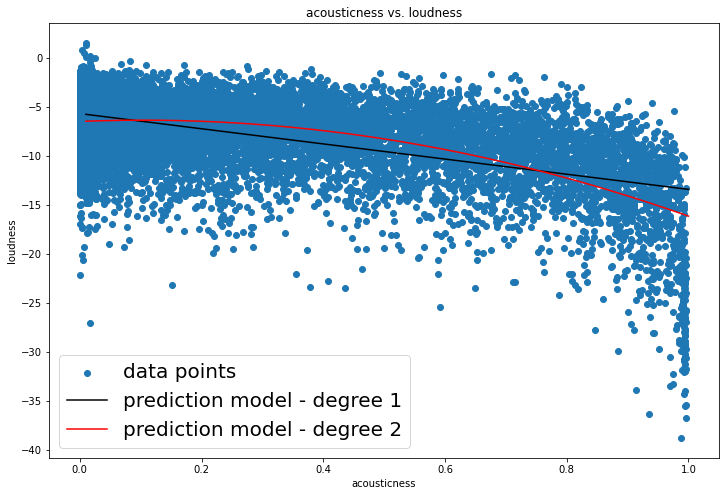

The polynomial regression model is the better perdiction model.
The model function is f(x) = -12.202779299668942 x^2 + (2.5415089206153363) x + (-6.455302348861938)


In [10]:
bestmodel(song_data['acousticness'],song_data['loudness'], 'acousticness','loudness')

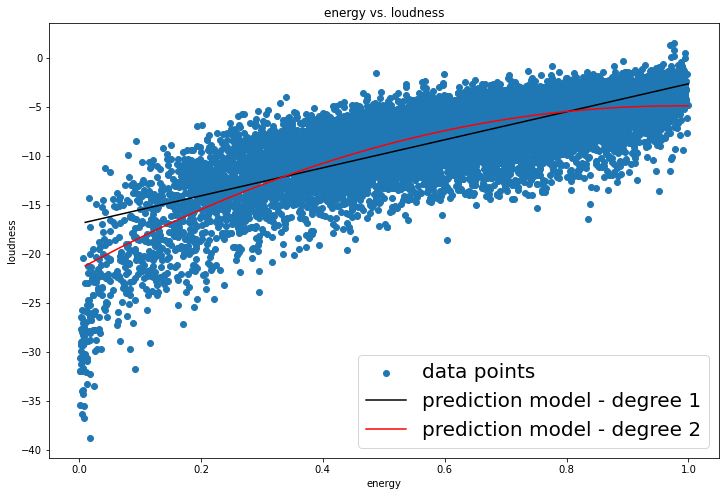

The polynomial regression model is the better perdiction model.
The model function is f(x) = -17.24124870032004 x^2 + (33.9087155672499) x + (-21.53255856725876)


In [11]:
bestmodel(song_data['energy'],song_data['loudness'], 'energy','loudness')

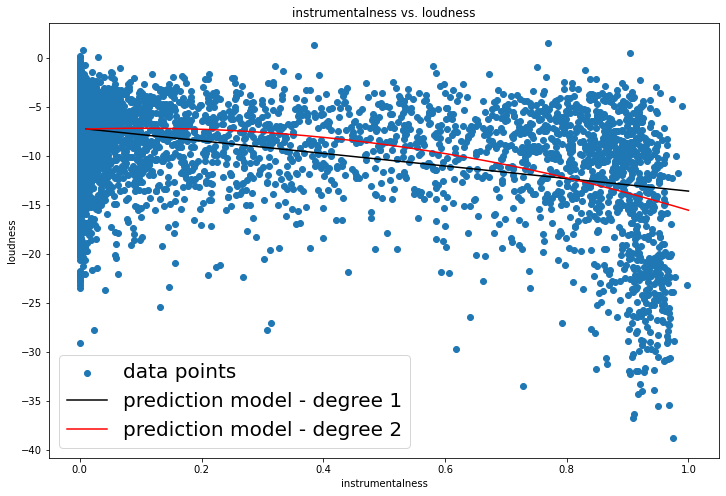

The polynomial regression model is the better perdiction model.
The model function is f(x) = -10.336887217889291 x^2 + (2.073037163706871) x + (-7.25304679176684)


In [12]:
bestmodel(song_data['instrumentalness'],song_data['loudness'],'instrumentalness','loudness')

Lastly, we wanted to see how different variables affect song popularity specifically. We created a new scatterplot matrix with song popularity plotted on the y axes, and each of the different variables plotted on the x axes.

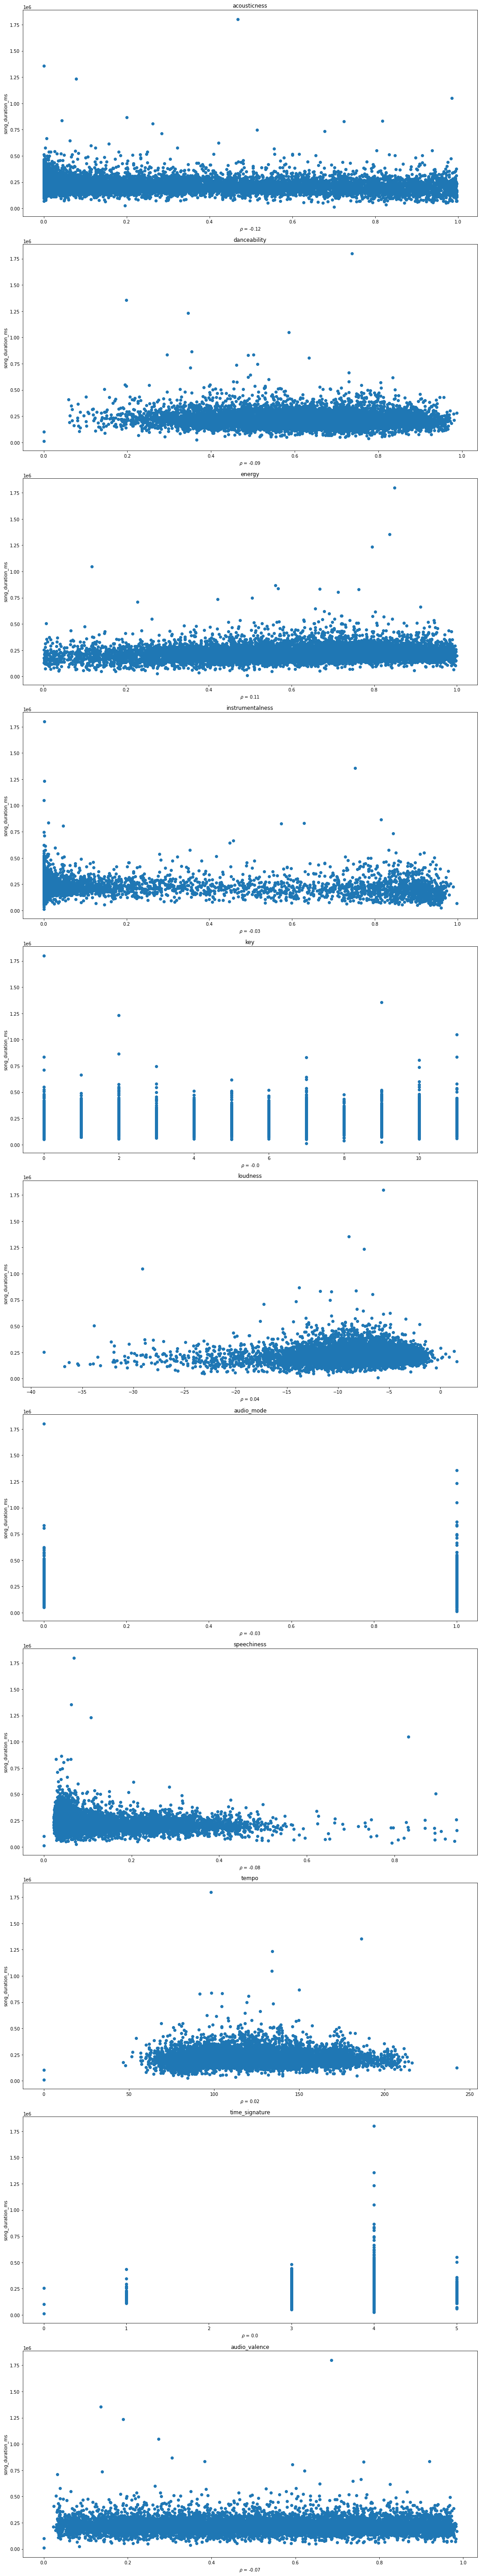

In [13]:
df = song_data.drop(['song_name'], axis = 1)
cold = list(df.columns)
figsize = (15, 80)

scatterplot_matrix_song_popularity(cols, figsize, df)

By observation, none of the variables have much of an effect on a song's popularity. 